# Wordcloud

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2


# Leemos el dataset

In [3]:
df = pd.read_csv('../data/train.csv').dropna(
    subset=['precio','metroscubiertos']
)

## Agregando frecuencia como feature

Nueva feature: frecuencia promedio de titulo y descripcion.
    
Intuicion: Inmuebles con titulos / descripciones con frecuencia promedio
similar pueden llegar a tener caracteristicas similares, por ejemplo el
precio.

In [4]:
import wordcloud_features as wf
desc_wc, titles_wc = wf.add_frequency_features(df)

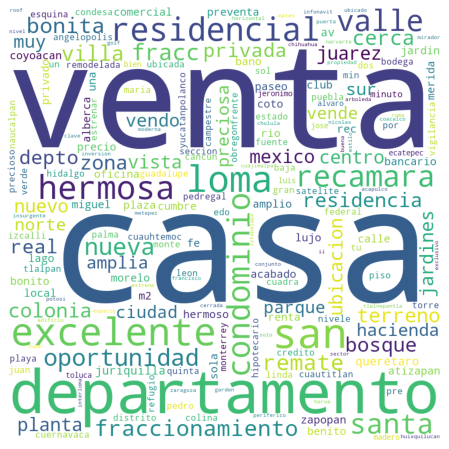

In [7]:
wf.plot_wc(titles_wc)

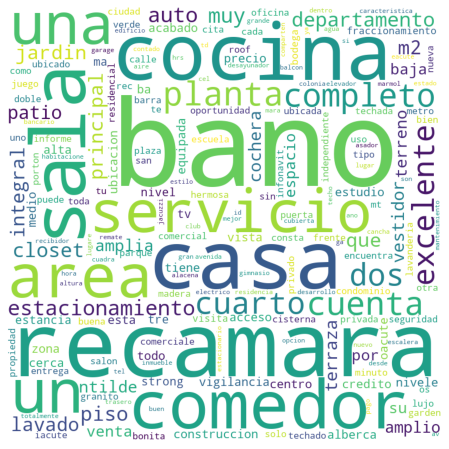

In [6]:
wf.plot_wc(desc_wc)

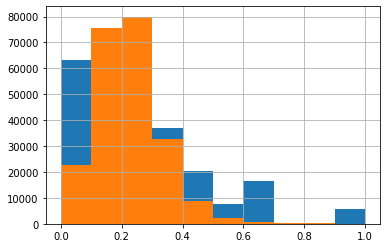

In [8]:
df['avg_freq_title'].hist()
df['avg_freq_desc'].hist()

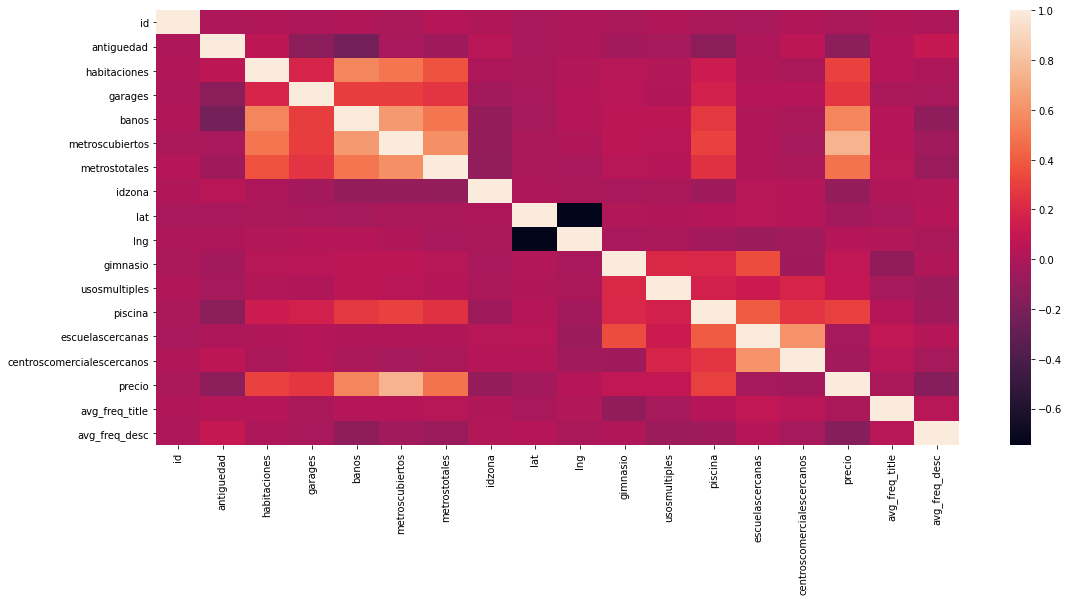

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(18, 8))
sns.heatmap(df[df["ciudad"]=="Mérida"].corr())

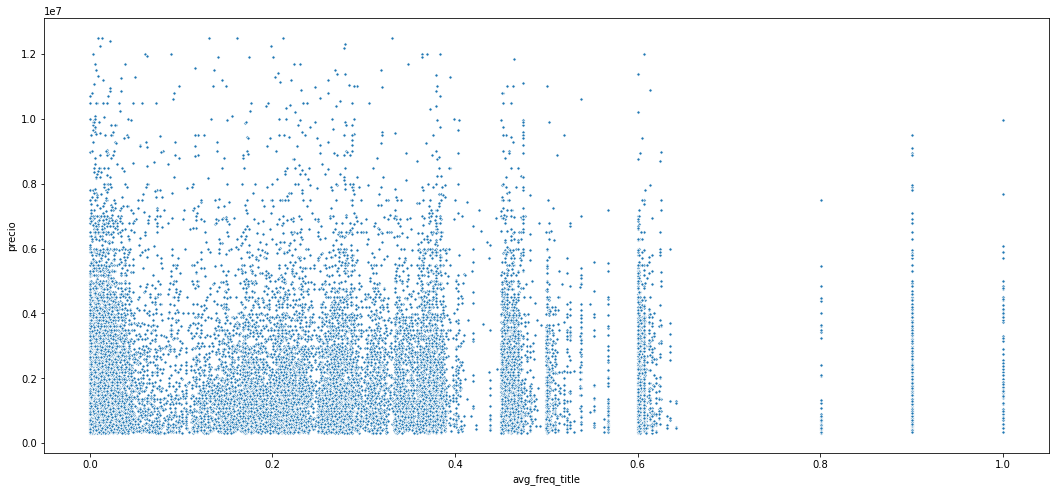

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(18, 8))
sns.scatterplot(data=df[df["provincia"]=="Jalisco"], x='avg_freq_title', y='precio', s=10)

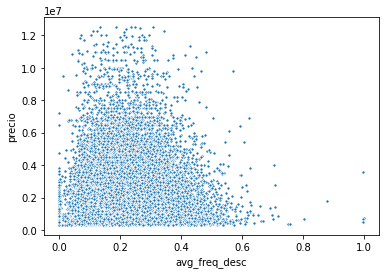

In [11]:
sns.scatterplot(data=df[df["provincia"]=="Jalisco"], x='avg_freq_desc', y='precio', s=10)

In [33]:
import wrappers
from cross_validation import cross_validate

K = 10
debug = False

clf = wrappers.ProyectionRegression(
    #features=['metroscubiertos', 'avg_freq_title', 'avg_freq_desc'],
    features=["metroscubiertos"],
    explain='precio',
    func_segment = lambda df: wrappers.segment_by_col(df, 'provincia'),
)

clf.fit(df)
pred = clf.predict(df)

#scores = clf.scores(df, ["r2", "rmse", "rmsle"])
#print("scores:", scores)

import matplotlib.pyplot as plt
#plt.subplots(1, 1, figsize=(18, 8))
#ppred = pred[pred["provincia"]=="Jalisco"]
#sns.scatterplot(data=ppred, x='freq_title', y='precio', hue='provincia')
#sns.lineplot(data=ppred, x='freq_title', y='prediction')
scores, df_pred = cross_validate(clf, df, ["r2", "rmse", "rmsle"], K, debug)

In [34]:
df_pred["error"] = df["precio"] - df['prediction']

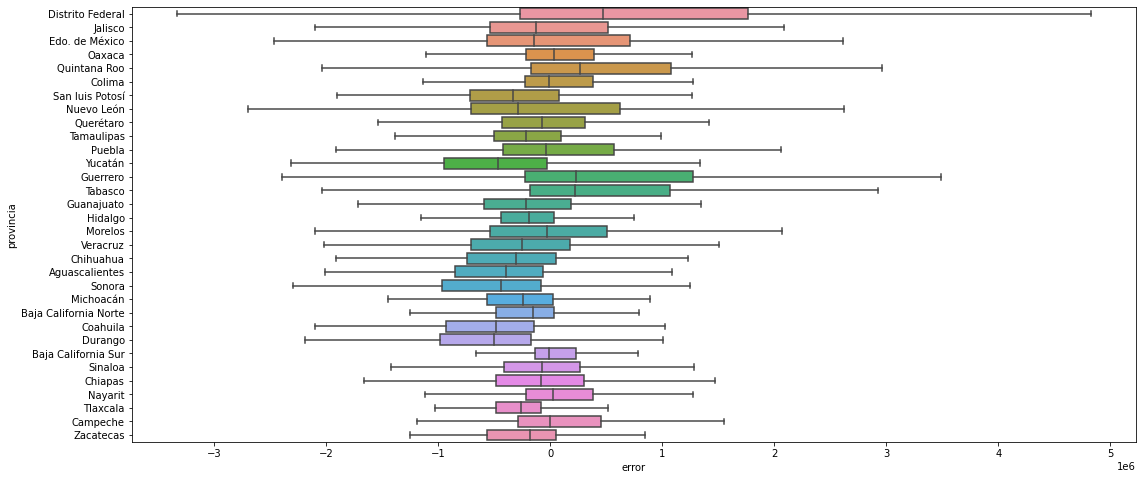

In [36]:
plt.subplots(1, 1, figsize=(18, 8))
sns.boxplot(data=df, y="provincia", x="error", showfliers=False)

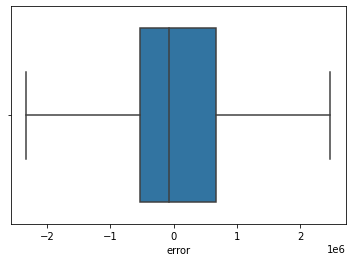

In [37]:
sns.boxplot(data=df, x="error", showfliers=False)